### Gradient Descent

It is an optimization algorithm that works iteratively and aims to find the minimum value of a convex function with respect to a set of parameters.

Phases:
1. Random Initialization
2. Generating Predictions
3. Calculating Cost
4. Updating Parameters

##### * Random Initialization
slope m= 0.1
intercept c

##### * Generating Predictions
Y_hat=mX+c

##### * Calculating Cost
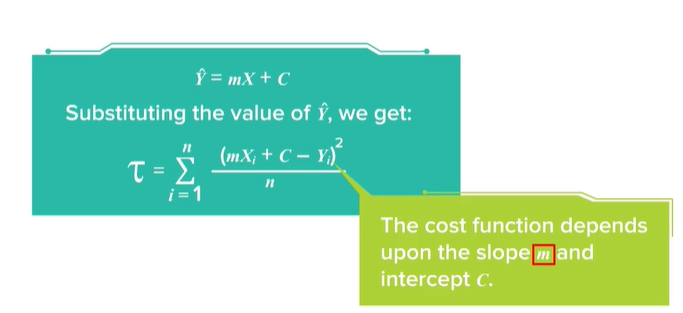

##### * Updating Parameters
m_new = m_old - Zm
c_new = c_old - Zc

if z +ve, parameter decreases and if z is -ve, it increases
use partial differentiation to find z

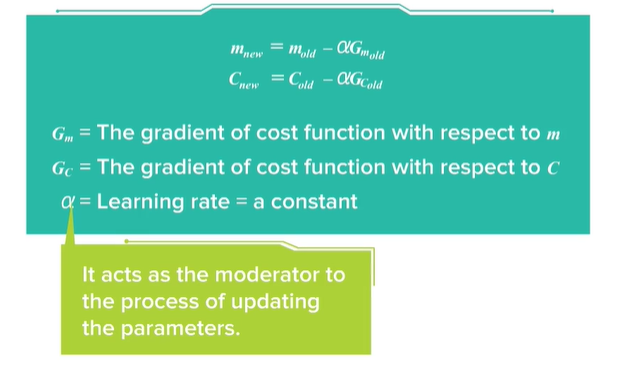
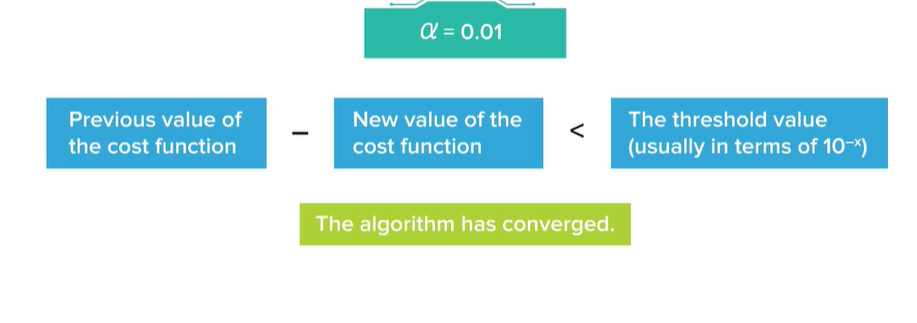

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Transformed_Housing_Data')
data.head()

,ID,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Condition of the House,...,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever Renovated,Years since Renovation
0,7129300520,221900.0,3,1.00,1180.0,5650.0,1.0,No,0,Fair,...,1180.0,0,63,98178.0,47.5112,-122.257,1340.0,5650,No,0
1,6414100192,538000.0,3,2.25,2570.0,7242.0,2.0,No,0,Fair,...,2170.0,400,67,98125.0,47.7210,-122.319,1690.0,7639,Yes,26
2,5631500400,180000.0,2,1.00,770.0,10000.0,1.0,No,0,Fair,...,770.0,0,85,98028.0,47.7379,-122.233,2720.0,8062,No,0
3,2487200875,604000.0,4,3.00,1960.0,5000.0,1.0,No,0,Excellent,...,1050.0,910,53,98136.0,47.5208,-122.393,1360.0,5000,No,0
4,1954400510,510000.0,3,2.00,1680.0,8080.0,1.0,No,0,Fair,...,1680.0,0,31,98074.0,47.6168,-122.045,1800.0,7503,No,0


In [3]:
def param_init(Y):
    '''
    Y = target variable
    returns initialized values of m and c
    '''
    m = 0.1
    c = Y.mean()
    return m,c

In [4]:
def generate_predictions(m,c,X):
    '''
    X = independent variable
    returns prediction generated by line with parameters m,c
    '''
    prediction = []
    for x in X:
        pred = (m*x)+c
        prediction.append(pred)
    return prediction

In [5]:
def compute_cost(prediction, Y):
    '''
    returns the mse between prediction and Y
    '''
    cost = np.mean(((prediction-Y)**2)/len(Y))
    return cost

In [6]:
def gradients(prediction,Y,X):
    '''
    returns gradients corresponding to m and c
    '''
    n=len(Y)
    Gm = 2/n * np.sum((prediction-Y)*X)
    Gc = 2/n * np.sum((prediction-Y))
    return Gm,Gc

In [7]:
def param_update(m_old,c_old,Gm_old,Gc_old,alpha):
    '''
    update and return the new values of m and c
    '''
    m_new = m_old - alpha * Gm_old
    c_new = c_old - alpha * Gc_old
    return m_new, c_new

In [8]:
def result(m,c,X,Y,cost,prediction,i):
    '''
    print and plot the final result obtained from gradient descent
    '''
    # if the gradient descent converged to the optimum value before max_iter
    if i < max_iter - 1:
        print(" Gradient descent has converged at interation{}".format(i))
    else:
        print(" Result after ", max_iter,' iteration is :')
        
    # plotting the final result
    plt.figure(figsize =(14,7), dpi = 120)
    plt.scatter(X,Y,color='red',label='data points')
    label = 'final regression line: m = {} ; c= {}'.format(str(m),str(c))
    plt.plot(X,predictions,color='green',label = label)
    plt.xlabel('flat_area')
    plt.ylabel('sale_price')
    plt.title('final regression line')
    plt.legend()

After Iteration 0 : m = 0.11190340851684136 ; c = -6.2606940112325e-17 ; Cost = 4.0305702014511865e-05
After Iteration 20 : m = 0.3057767154139297 ; c = -4.679737246211187e-17 ; Cost = 3.121928680364502e-05
After Iteration 40 : m = 0.4352080806089478 ; c = -2.485863798577615e-17 ; Cost = 2.716946787369562e-05
 Gradient descent has converged at interation48


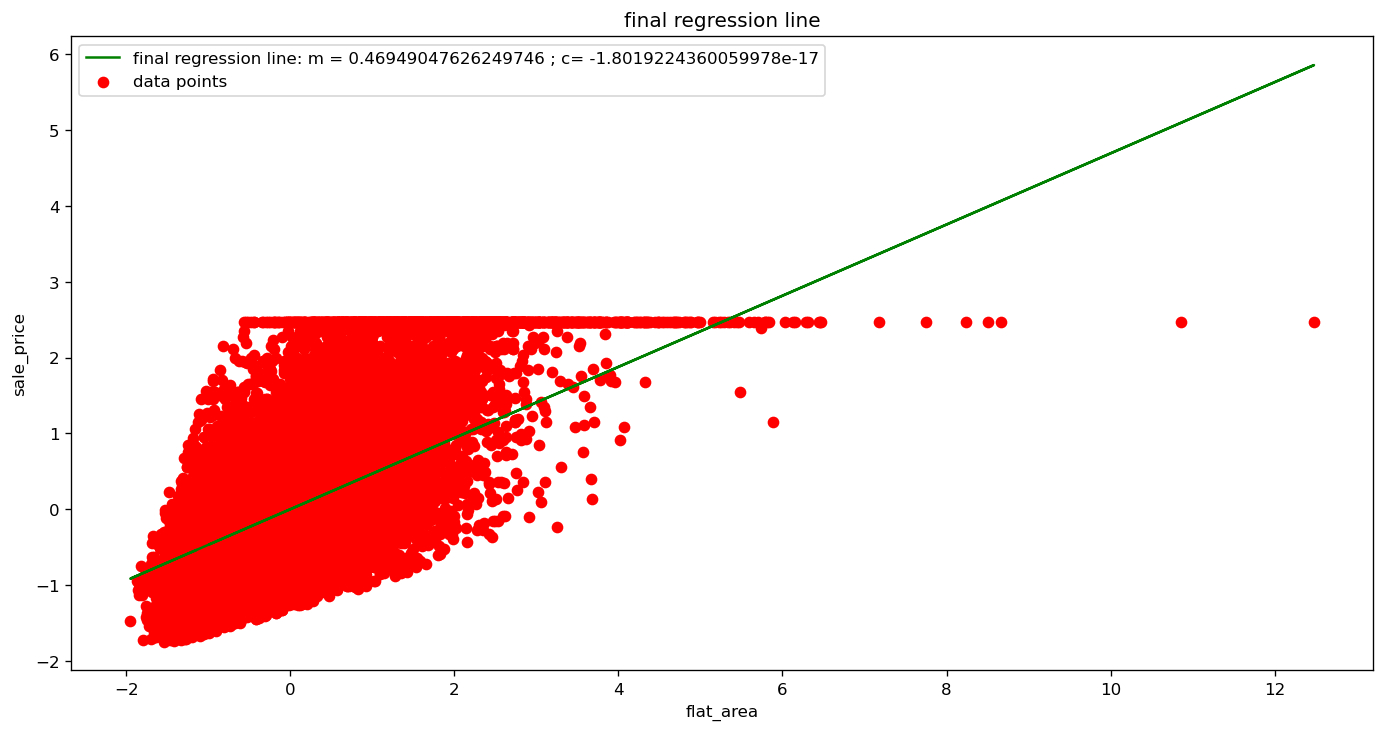

In [12]:
## scaling the dataset using standard scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

sale_price = scaler.fit_transform(data['Sale Price'].values.reshape(-1,1))
flat_area = scaler.fit_transform(data['Flat Area (in Sqft)'].values.reshape(-1,1))

## declaring parameters
max_iter = 1000
cost_old = 0
alpha = 0.01

## step 1: initializing the values of m and c
m,c = param_init(sale_price)

## gradient descent in action
for i in range(0,max_iter):
    
    ## step 2 : generating predictions
    predictions = generate_predictions(m,c,flat_area)
    
    ## step 3 : calculating cost
    cost_new = compute_cost(predictions,sale_price)
    
    ## checking if GD converged
    if abs(cost_new - cost_old) < 10**(-7):
        break
        
    ## calculating gradients
    Gm,Gc = gradients(predictions,sale_price,flat_area)
    
    ## step 4 : updating parameters m and c
    m,c = param_update(m,c,Gm,Gc,alpha)
    
    ## displat result after every 20 iterations
    if i%20 == 0:
        print('After Iteration', i, ': m =',m, '; c =',c,'; Cost =', cost_new)
     
    ## updating cost_old
    cost_old=cost_new
    
## final results
result(m,c,flat_area,sale_price,cost_new,predictions,i)
    
    